## Exploratory Data Analysis on Customer Loans in Finance

In [1]:
import pandas as pd
from data_frame_info import DataFrameInfo
from data_transform import DataTransform
from data_frame_transform import DataFrameTransform
from data_plot import Plotter

In [2]:
#create instances of each class
info = DataFrameInfo()
trans = DataTransform()
dftf = DataFrameTransform()
plot = Plotter()


# info.check_dtypes(df)
# info.shape(df)
# info.column_list(df)
# info.column_info_dataframe(df, column = None)
# info.filter_column_info_dataframe(self, dataframe, column_to_filter, vaules_to_filter: list)
# info.get_null_percentage(df)

#trans.convert_to_category(self, dataframe, column_name)
#trans.convert_to_timeperiod(self, dataframe, column_name, frequency='M')
#trans.convert_to_integer(self, dataframe, column_name)
#trans.convert_to_string(self, dataframe, column_name)

#dftf.remove_null_columns(df, column_name)
#dftf.remove_null_rows(df, column_name)


In [3]:
#load data as a dataframe
df = pd.read_csv('loan_payments.csv')
df_original = df.copy()

### Data Transformation



In [4]:
#Exploring the data: print the shape, print list of columns
info.column_list(df, print)
info.shape(df, print)

The DataFrame has column names: ['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type'].
The DataFrame has 43 columns and 54231 rows.


now we want to explore the properties of the columns and their null counts

In [5]:
info_df = info.column_info_dataframe(df, column = None)
info_df

,Column Name,Distinct Values,Distinct Values Count,Data Type,Null Values Count
id,id,"[38676116, 38656203, 38656154, 38656128, 38656...",54231,int64,0
member_id,member_id,"[41461848, 41440010, 41439961, 41439934, 41439...",54231,int64,0
loan_amount,loan_amount,"[8000, 13200, 16000, 15000, 2525, 6675, 26500,...",1083,int64,0
funded_amount,funded_amount,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",1123,float64,3007
funded_amount_inv,funded_amount_inv,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",5261,float64,0
term,term,"[36 months, nan, 60 months]",3,object,4772
int_rate,int_rate,"[7.49, 6.99, 14.31, 6.03, 11.44, 21.99, 19.99,...",458,float64,5169
instalment,instalment,"[248.82, 407.52, 497.63, 514.93, 456.54, 83.2,...",19940,float64,0
grade,grade,"[A, C, B, E, F, D, G]",7,object,0
sub_grade,sub_grade,"[A4, A3, C4, A1, B4, E5, E3, C2, A5, B3, C1, C...",35,object,0


We see columns that contain dates being displayed as object datatypes and other object datatypes that would be better suited to category type as they have a small number of distinct values that they can take.

We get a list of month data: - notice that 

In [6]:
#There are also many columns that count the number of months since or until an event. these should be an int datatype
# to find this we search for the string 'mths' in the list of column names

cols_with_mths = [col for col in info.column_list(df) if 'mths' in col]

info.filter_column_info_dataframe(df, 'Column Name', cols_with_mths)

,Column Name,Distinct Values,Distinct Values Count,Data Type,Null Values Count
inq_last_6mths,inq_last_6mths,"[1, 0, 2, 6, 3, 4, 5, 8, 7, 9, 10, 11, 15, 12,...",24,int64,0
mths_since_last_delinq,mths_since_last_delinq,"[5.0, nan, 69.0, 74.0, 37.0, 8.0, 43.0, 35.0, ...",101,float64,31002
mths_since_last_record,mths_since_last_record,"[nan, 113.0, 69.0, 64.0, 114.0, 67.0, 38.0, 96...",121,float64,48050
collections_12_mths_ex_med,collections_12_mths_ex_med,"[0.0, 1.0, 2.0, 3.0, 4.0, nan]",6,float64,51
mths_since_last_major_derog,mths_since_last_major_derog,"[5.0, nan, 43.0, 75.0, 58.0, 38.0, 31.0, 66.0,...",114,float64,46732


In [7]:
#create list of columns to convert to int type for use later
cols_for_convert_int = cols_with_mths.copy()
cols_for_convert_int.remove('inq_last_6mths')

cols_for_convert_int

['mths_since_last_delinq',
 'mths_since_last_record',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog']

Now we do the same searching for the key word 'date' as this will indicate columns that should be in datetime type

In [8]:
cols_with_date = [col for col in info.column_list(df) if 'date' in col]
cols_with_date.append('earliest_credit_line') #also this column should be datetype

info.filter_column_info_dataframe(df, 'Column Name', cols_with_date)

,Column Name,Distinct Values,Distinct Values Count,Data Type,Null Values Count
issue_date,issue_date,"[Jan-2021, Dec-2019, Nov-2019, Oct-2019, Sep-2...",61,object,0
earliest_credit_line,earliest_credit_line,"[Oct-1987, Sep-2001, Sep-1998, Jun-2008, Apr-2...",587,object,0
last_payment_date,last_payment_date,"[Jan-2022, Oct-2021, Jun-2021, Mar-2021, Aug-2...",99,object,73
next_payment_date,next_payment_date,"[Feb-2022, nan, Jan-2022, Jun-2019, Apr-2018, ...",97,object,32608
last_credit_pull_date,last_credit_pull_date,"[Jan-2022, Oct-2021, Jun-2021, Mar-2021, Nov-2...",102,object,7


In [9]:
#here we have 5 columns that need to be converted to date period
cols_for_convert_date = cols_with_date.copy()

Now we look for columns that should be categorical.

We filter our info_df for columns with a low number of distinct values to inspect:

In [10]:
#filter out columns we are already converting
remove_list = cols_for_convert_int + cols_for_convert_date
new_col_list = [x for x in info.column_list(df) if not x in remove_list]

#filter out the columns
filtered_info_df = info.filter_column_info_dataframe(df, 'Column Name', new_col_list)

#display only rows with small number of distinct values
low_distinct_count_df = filtered_info_df[filtered_info_df['Distinct Values Count'] < 100]
low_distinct_count_df

,Column Name,Distinct Values,Distinct Values Count,Data Type,Null Values Count
term,term,"[36 months, nan, 60 months]",3,object,4772
grade,grade,"[A, C, B, E, F, D, G]",7,object,0
sub_grade,sub_grade,"[A4, A3, C4, A1, B4, E5, E3, C2, A5, B3, C1, C...",35,object,0
employment_length,employment_length,"[5 years, 9 years, 8 years, 1 year, 10+ years,...",12,object,2118
home_ownership,home_ownership,"[MORTGAGE, RENT, OWN, OTHER, NONE]",5,object,0
verification_status,verification_status,"[Not Verified, Source Verified, Verified]",3,object,0
loan_status,loan_status,"[Current, Fully Paid, Charged Off, Late (31-12...",9,object,0
payment_plan,payment_plan,"[n, y]",2,object,0
purpose,purpose,"[credit_card, debt_consolidation, home_improve...",14,object,0
delinq_2yrs,delinq_2yrs,"[2, 0, 1, 3, 7, 9, 5, 4, 6, 10, 17, 8, 15, 11,...",16,int64,0


This gives us 15 results. The int type rows should remain as int as it is numerical count data. Except for 'policy_code' column, which we know from the loans dataset schema that it can only take values policy_code={1,2}.

In [11]:
all = low_distinct_count_df.index.tolist() #list of column names in the above dataframe

remove = low_distinct_count_df[low_distinct_count_df['Data Type'] == 'int64'].index.tolist() #list of column names that are int and should stay int

#remove 'policy_code'
remove2 = remove.copy()
remove2.remove('policy_code')

cols_for_convert_categ = [x for x in all if not x in remove2]
cols_for_convert_categ

['term',
 'grade',
 'sub_grade',
 'employment_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'payment_plan',
 'purpose',
 'policy_code',
 'application_type']

In [12]:
#check to view all distinct values in the columns in cols_for_convert_categ
for item in cols_for_convert_categ:
    print(item,info.filter_column_info_dataframe(df, 'Column Name', cols_for_convert_categ).loc[item, 'Distinct Values'])

term ['36 months' nan '60 months']
grade ['A' 'C' 'B' 'E' 'F' 'D' 'G']
sub_grade ['A4' 'A3' 'C4' 'A1' 'B4' 'E5' 'E3' 'C2' 'A5' 'B3' 'C1' 'C3' 'F1' 'D2'
 'F4' 'B2' 'D1' 'E2' 'A2' 'D3' 'D4' 'E1' 'B1' 'D5' 'C5' 'B5' 'G1' 'G3'
 'F2' 'E4' 'F5' 'G2' 'F3' 'G4' 'G5']
employment_length ['5 years' '9 years' '8 years' '1 year' '10+ years' '< 1 year' nan
 '7 years' '3 years' '4 years' '6 years' '2 years']
home_ownership ['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']
verification_status ['Not Verified' 'Source Verified' 'Verified']
loan_status ['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
payment_plan ['n' 'y']
purpose ['credit_card' 'debt_consolidation' 'home_improvement' 'small_business'
 'renewable_energy' 'major_purchase' 'other' 'moving' 'car' 'medical'
 'house' 'vacation' 'wedding' 'educational']
policy_code [1]
application_type 

WE now have 3 lists of column names that need to be converted:
- cols_for_convert_categ
- cols_for_convert_date
- cols_for_convert_int

#### Convert columns to the correct format

First we look a

In [13]:
#convert columns to the correct format

#trans.convert_to_category(self, dataframe, column_name)
#trans.convert_to_timeperiod(self, dataframe, column_name, frequency='M')
#trans.convert_to_integer(self, dataframe, column_name)
#trans.convert_to_string(self, dataframe, column_name)

for column in cols_for_convert_categ:
    trans.convert_to_category(df, column)

for column in cols_for_convert_int:
    trans.convert_to_integer(df, column)

for column in cols_for_convert_date:
    trans.convert_to_timeperiod(df, column)



c:\Users\Nadia\Documents\10. Courses\AI Core\exploratory-data-analysis---customer-loans-in-finance489\data_transform.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe[column_name] = pd.to_datetime(dataframe[column_name], errors='coerce')
c:\Users\Nadia\Documents\10. Courses\AI Core\exploratory-data-analysis---customer-loans-in-finance489\data_transform.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe[column_name] = pd.to_datetime(dataframe[column_name], errors='coerce')
c:\Users\Nadia\Documents\10. Courses\AI Core\exploratory-data-analysis---customer-loans-in-finance489\data_transform.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back

In [14]:
#check to see if datatypes have changed
info.column_info_dataframe(df, column = None)

,Column Name,Distinct Values,Distinct Values Count,Data Type,Null Values Count
id,id,"[38676116, 38656203, 38656154, 38656128, 38656...",54231,int64,0
member_id,member_id,"[41461848, 41440010, 41439961, 41439934, 41439...",54231,int64,0
loan_amount,loan_amount,"[8000, 13200, 16000, 15000, 2525, 6675, 26500,...",1083,int64,0
funded_amount,funded_amount,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",1123,float64,3007
funded_amount_inv,funded_amount_inv,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",5261,float64,0
term,term,"['36 months', NaN, '60 months'] Categories (2,...",3,category,4772
int_rate,int_rate,"[7.49, 6.99, 14.31, 6.03, 11.44, 21.99, 19.99,...",458,float64,5169
instalment,instalment,"[248.82, 407.52, 497.63, 514.93, 456.54, 83.2,...",19940,float64,0
grade,grade,"['A', 'C', 'B', 'E', 'F', 'D', 'G'] Categories...",7,category,0
sub_grade,sub_grade,"['A4', 'A3', 'C4', 'A1', 'B4', ..., 'F5', 'G2'...",35,category,0


Deal with null values

In [15]:
null_percentages = info.get_null_percentage(df)
null_percentages[null_percentages['Null Values %'] > 0]

,Column Name,Null Values %
0,mths_since_last_record,88.60
1,mths_since_last_major_derog,86.17
2,next_payment_date,60.13
3,mths_since_last_delinq,57.17
4,int_rate,9.53
5,term,8.80
6,funded_amount,5.54
7,employment_length,3.91
8,last_payment_date,0.13
9,collections_12_mths_ex_med,0.09


The above displays all columns with their percentage of null values. 

- We have 4 columns with a large percentage (>50%) of null values so we will drop these columns as it does not make sense to impute here or drop the records as we will be losing a large amount of data

- 3 columns have < 1% missing values. Given this is only a small subset of our dataset, one option might be to drop those rows

In [16]:
#remove missing values in the data: columns mths_since_last_record, mths_since_last_major_derog, next_payment_date,	mths_since_last_delinq
#dftf.remove_null_columns(df, column_name)
#dftf.remove_null_rows(df, column_name)

In [17]:
col_to_drop = null_percentages[null_percentages['Null Values %'] > 50]['Column Name'] #pandas series

for col in col_to_drop:
    dftf.remove_null_columns(df, col)

In [18]:
#check cols have been removed
for col in col_to_drop:
    print(col in info.column_list(df))


False
False
False
False


In [19]:
row_to_drop = null_percentages[null_percentages['Null Values %'] < 1]['Column Name'] #pandas series

for row in row_to_drop:
    dftf.remove_null_rows(df, row)

In [20]:
og_rows = info.shape(df_original)[0]
og_cols = info.shape(df_original)[1]
new_rows = info.shape(df)[0]
new_cols = info.shape(df)[1]
rows_lost = ((og_rows - new_rows) / og_rows )*100
print(f'transformed shape: {info.shape(df)}. And original df shape: {info.shape(df_original)}')
print(f'{og_cols - new_cols} columns dropped')
print(f'{info.shape(df_original)[0] - info.shape(df)[0]} rows dropped. That is {rows_lost}% of rows lost')

transformed shape: (54100, 39). And original df shape: (54231, 43)
4 columns dropped
131 rows dropped. That is 0.24155925577621656% of rows lost


In [21]:
null_percentages = info.get_null_percentage(df)
display(null_percentages[null_percentages['Null Values %'] > 0])

cols_to_impute = null_percentages[null_percentages['Null Values %'] > 0]['Column Name']

,Column Name,Null Values %
0,int_rate,9.54
1,term,8.80
2,funded_amount,5.54
3,employment_length,3.91


In [22]:
#perform transformations on skewed columns
#info.column_info_dataframe(df, column = ['int_rate', 'term'])

pd.merge(null_percentages, info.column_info_dataframe(df), on='Column Name')

,Column Name,Null Values %,Distinct Values,Distinct Values Count,Data Type,Null Values Count
0,int_rate,9.54,"[7.49, 6.99, 14.31, 6.03, 11.44, 21.99, 19.99,...",456,float64,5159
1,term,8.80,"['36 months', NaN, '60 months'] Categories (2,...",3,category,4762
2,funded_amount,5.54,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",1123,float64,2998
3,employment_length,3.91,"['5 years', '9 years', '8 years', '1 year', '1...",12,category,2114
4,id,0.00,"[38676116, 38656203, 38656154, 38656128, 38656...",54100,int64,0
5,member_id,0.00,"[41461848, 41440010, 41439961, 41439934, 41439...",54100,int64,0
6,loan_amount,0.00,"[8000, 13200, 16000, 15000, 2525, 6675, 26500,...",1083,int64,0
7,funded_amount_inv,0.00,"[8000.0, 13200.0, 16000.0, 15000.0, 2525.0, 66...",5260,float64,0
8,instalment,0.00,"[248.82, 407.52, 497.63, 514.93, 456.54, 83.2,...",19894,float64,0
9,grade,0.00,"['A', 'C', 'B', 'E', 'F', 'D', 'G'] Categories...",7,category,0


So we have 4 columns with null values that we can impute.

Next is to choose the imputation method
If the percentage of missing data is relatively small, you may choose to impute the missing values using statistical methods such as mean or median imputation. Alternatively, if the percentage of missing data is large or if the missing data is not missing at random, you may choose to remove the variables or rows with missing data entirely.

If skewed - use mediam imputation
If continuous normal distributed - use mean
if categorical - use mode

<Axes: >

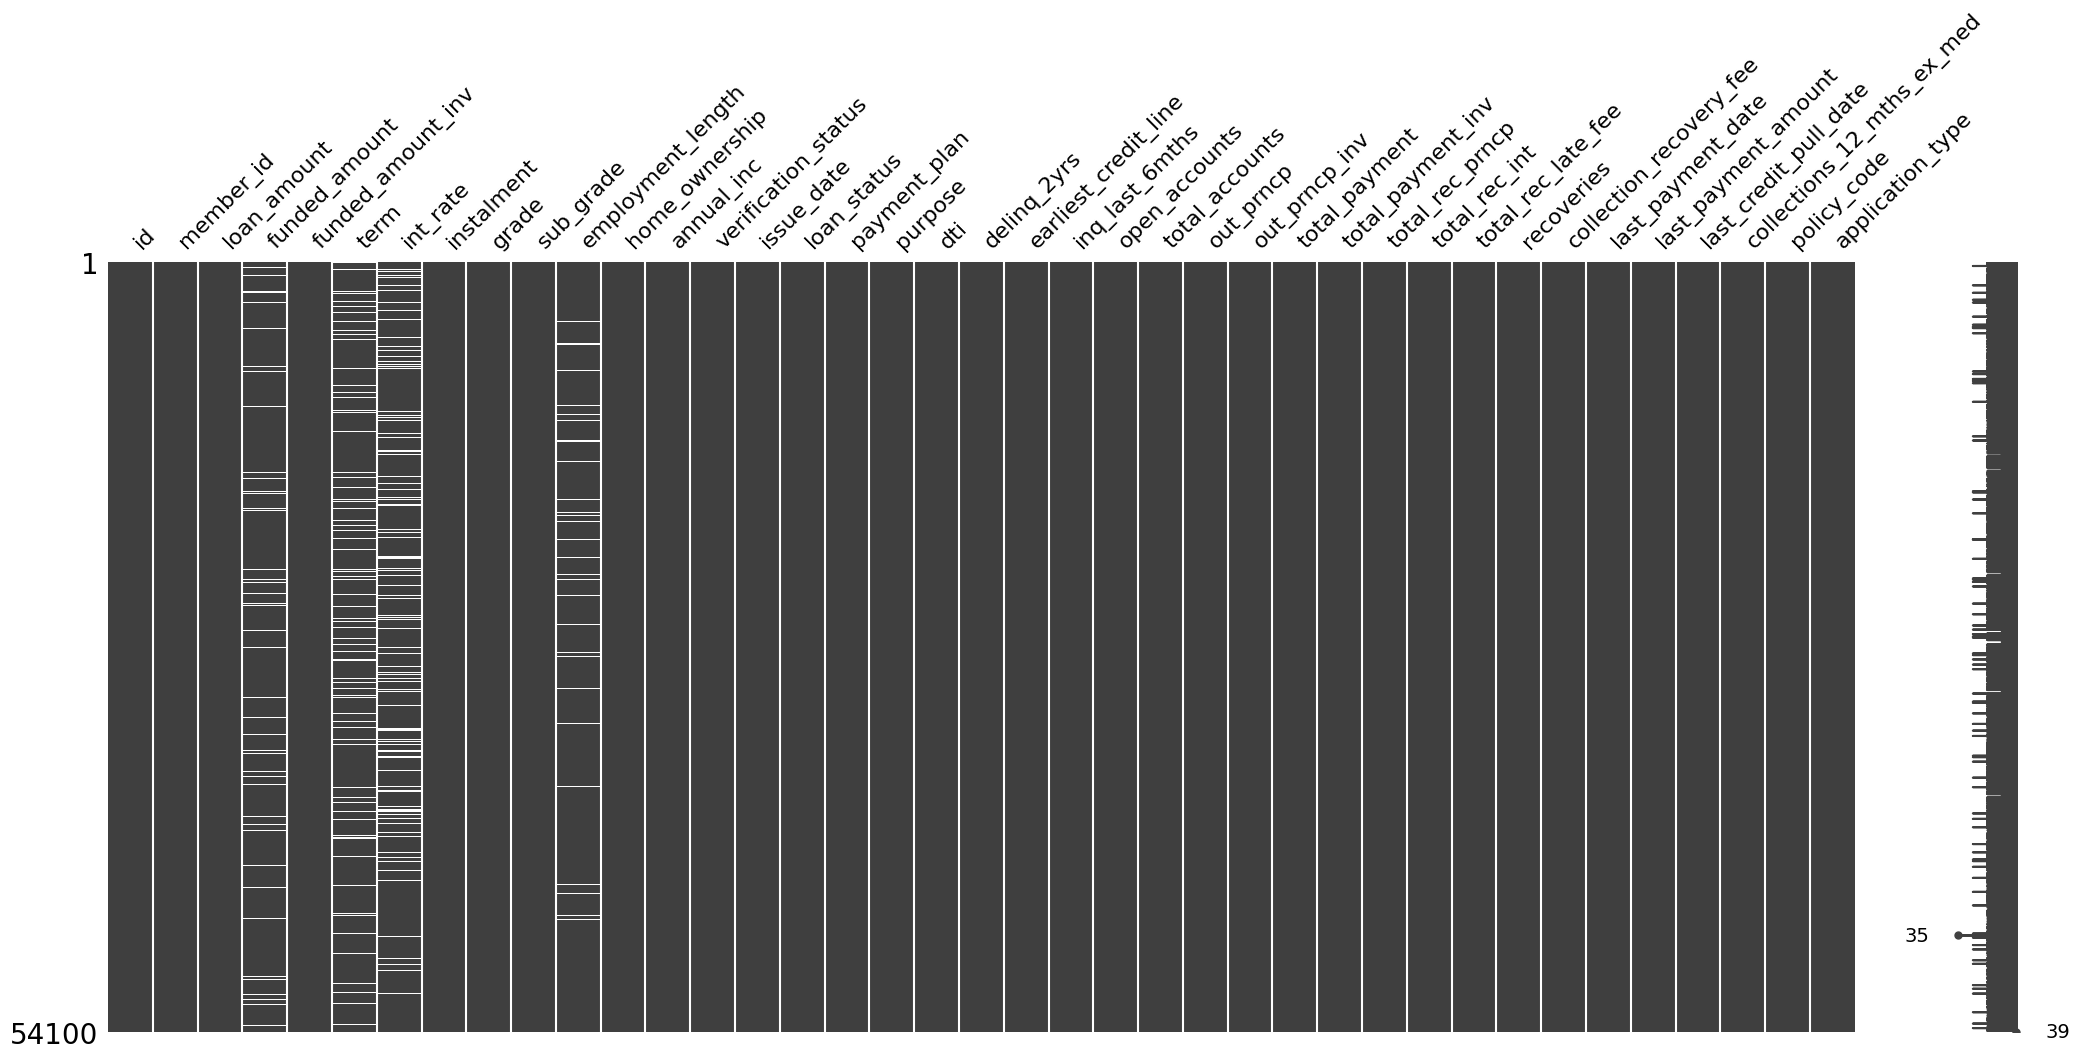

In [23]:
plot.missing_matrix(df)

Looks like it is missing at random

Columns 'term' and 'employment_length' are categorical so will use mode imputation

We check the skew of the distribution of columns 'funded_amount' and 'int_rate' to determine whether to use mean or median imputation.


- term	categorical - mode  imputation
- employment_length 	categorical  - mode imputation
- funded_amount
- int_rate


In [29]:
print('int_rate',df['int_rate'].skew())
print('funded_amount',df['funded_amount'].skew())

#use skew threshold of 0.5

int_rate 0.411540039874641
funded_amount 0.8208113751273644


Using a skew threshold of 0.5, say:
- int_rate column is normally distributed and will use mean imputaiton
- funded_amount is positively skewed and will use mediam imputation

In [50]:
#imputations

dftf.impute_med(df, 'funded_amount')
dftf.impute_mean(df, 'int_rate')
dftf.impute_mode(df, 'employment_length')
dftf.impute_mode(df, 'term')

# check to see no null values
info.get_null_percentage(df)
info.column_info_dataframe(df)


AttributeError: 'DataFrameTransform' object has no attribute 'impute_med'

In [48]:
#Generate a plot by creating a method in your Plotter class to visualise the removal of NULL values

str

#### Analyse and transform skewed columns

Skewed data can lead to biased models and inaccurate results, so it's important to address this issue before proceeding with any analysis.


Step 1: Firstly you will need to identify the skewed columns in the data. This can be done using standard Pandas methods. You then need to determine a threshold for the skewness of the data, over which a column will be considered skewed. You should also visualise the data using your Plotter class to analyse the skew.


Step 2: Once the skewed columns are identified, you should perform transformations on these columns to determine which transformation results in the biggest reduction in skew. Create the the method to transform the columns in your DateFrameTransform class.


Step 3: Apply the identified transformations to the columns to reduce their skewness.


Step 4: Visualise the data to check the results of the transformation have improved the skewness of the data.


Step 5: At this point you may want to save a separate copy of your DataFrame to compare your results.

In [ ]:
#

#### remove outliers from the data

Removing outliers from the dataset will improve the quality and accuracy of the analysis as outliers can distort the analysis results. You will need to first identify the outliers and then use a method to remove them.


Step 1: First visualise your data using your Plotter class to determine if the columns contain outliers.


Step 2: Once identified use a method to transform or remove the outliers from the dataset. Build this method in your DataFrameTransform class.


Step 3: With the outliers transformed/removed re-visualise your data with you Plotter class to check that the outliers have been correctly removed.

In [ ]:
#remove outliers from the data



#### Drop overly correlated columns

Highly correlated columns in a dataset can lead to multicollinearity issues, which can affect the accuracy and interpretability of models built on the data. In this task, you will identify highly correlated columns and remove them to improve the quality of the data.


Step 1: First compute the correlation matrix for the dataset and visualise it.


Step 2: Identify which columns are highly correlated. You will need to decide on a correlation threshold and to remove all columns above this threshold.


Step 3: Decide which columns can be removed based on the results of your analysis.


Step 4: Remove the highly correlated columns from the dataset.

In [ ]:
#drop overly correlated columns

### Analysis and Visualisation